## Análisis de datos - Clase 5

### Técnicas de reducción de dimensionalidad

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [93]:
# Dataset Iris
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [94]:
X = iris.data
y = iris.target
target_names = iris.target_names

np.shape(iris.data)

(150, 4)

In [95]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño train:", X_train.shape, "Test:", X_test.shape)

Tamaño train: (120, 4) Test: (30, 4)


In [97]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Principal Component Analysis (PCA)

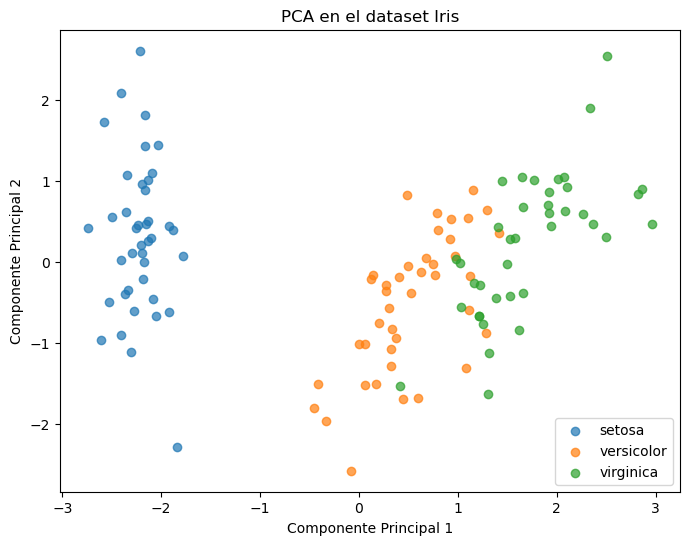

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.title("PCA en el dataset Iris")
plt.show()


In [99]:
print(pca.explained_variance_ratio_)  # % de varianza capturada por cada componente

[0.72551423 0.23000922]


In [100]:
df_pca = pd.DataFrame(X_train_pca, columns=['PCA1', 'PCA2'])
df_pca['target'] = y_train
df_pca

,PCA1,PCA2,target
0,-2.741058,0.415798,0
1,-2.214577,2.604762,0
2,0.926828,0.529167,1
3,-2.293429,0.108078,0
4,-2.524548,-0.496938,0
...,...,...,...
115,0.521362,-0.385743,1
116,0.415127,-1.535405,2
117,-2.159999,1.811532,0
118,0.377947,-0.947346,1


In [ ]:
# Luego de entrenado el modelo, habría que hacer PCA en el dataset de test para poder evaluarlo:
X_test_pca = pca.transform(X_test_scaled)

print(X_test_pca)

[[ 0.67946575 -0.38500577]
 [-1.85948524  1.36754843]
 [ 3.37418698  0.08283354]
 [ 0.71543345 -0.20586539]
 [ 1.30528623 -0.03401018]
 [-1.79741679  0.40889955]
 [ 0.0118878  -0.4238331 ]
 [ 1.96579214  0.70535798]
 [ 1.26604398 -1.54750123]
 [ 0.28394154 -0.74331181]
 [ 1.42644878  0.69591052]
 [-2.1930845  -0.72356615]
 [-2.01266056  0.6433383 ]
 [-2.15728158 -0.46935776]
 [-2.30465802  1.0789989 ]
 [ 0.80430783  0.76880417]
 [ 1.93224297  0.31011137]
 [ 0.20360019 -1.25723962]
 [ 0.43591001 -0.57019488]
 [ 1.92370994 -0.15063038]
 [-2.23522568 -0.35016414]
 [ 1.07775448  0.07612298]
 [-2.01634009  0.21944905]
 [ 1.84823852 -0.15864072]
 [ 2.37942447  2.61130874]
 [ 1.9336523   0.40597386]
 [ 2.05969213 -0.65299842]
 [ 2.10902509  0.87296387]
 [-2.04214167 -0.70754547]
 [-2.11151503 -0.5077728 ]]


### Linear Discriminant Analysis (LDA)

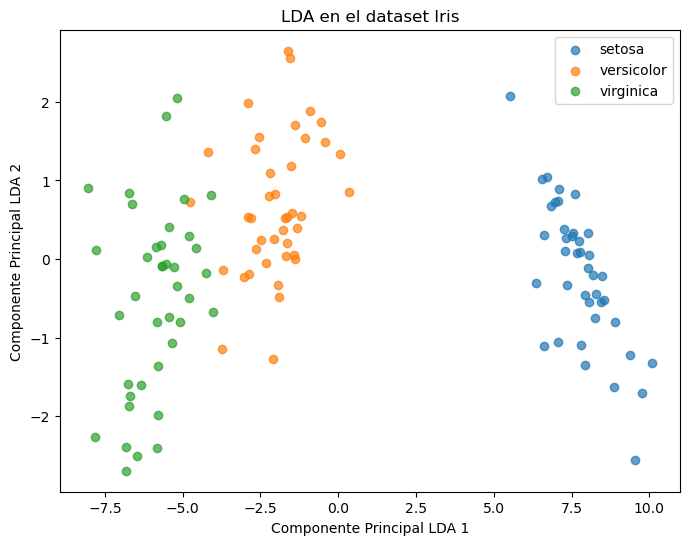

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train_scaled, y_train)

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_lda[y_train == i, 0], X_lda[y_train == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Componente Principal LDA 1")
plt.ylabel("Componente Principal LDA 2")
plt.legend()
plt.title("LDA en el dataset Iris")
plt.show()

In [103]:
print(f'Separabilidad: {lda.explained_variance_ratio_}')  # % de varianza capturada por cada componente

Separabilidad: [0.99229795 0.00770205]


In [104]:
df_lda = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
df_lda['target'] = y_train
df_lda

,LDA1,LDA2,target
0,8.911102,-0.802091,0
1,9.525179,-2.563805,0
2,-1.380277,0.000011,1
3,7.303022,0.097825,0
4,7.334804,0.266847,0
...,...,...,...
115,-1.193730,0.542204,1
116,-4.812226,0.287415,2
117,10.071633,-1.324683,0
118,-1.528119,1.188882,1


### t-Distributed Stochastic Neighbor Embedding (t-SNE)

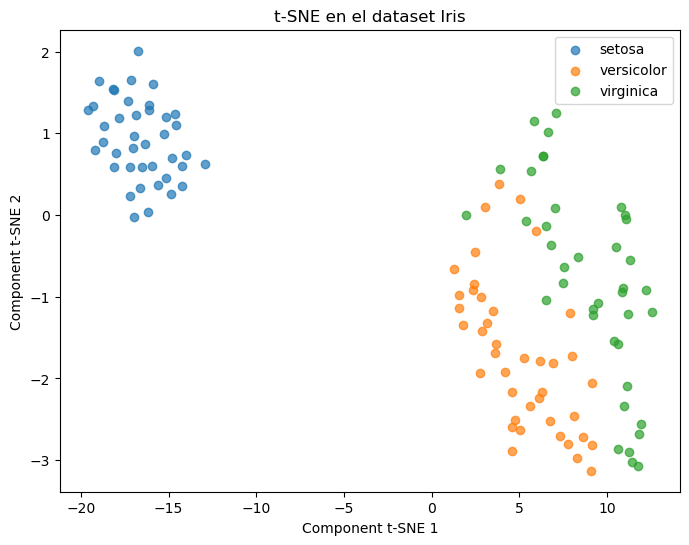

In [105]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_tsne[y_train == i, 0], X_tsne[y_train == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Component t-SNE 1")
plt.ylabel("Component t-SNE 2")
plt.legend()
plt.title("t-SNE en el dataset Iris")
plt.show()

### Uniform Manifold Approximation and Projection (UMAP)

In [106]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

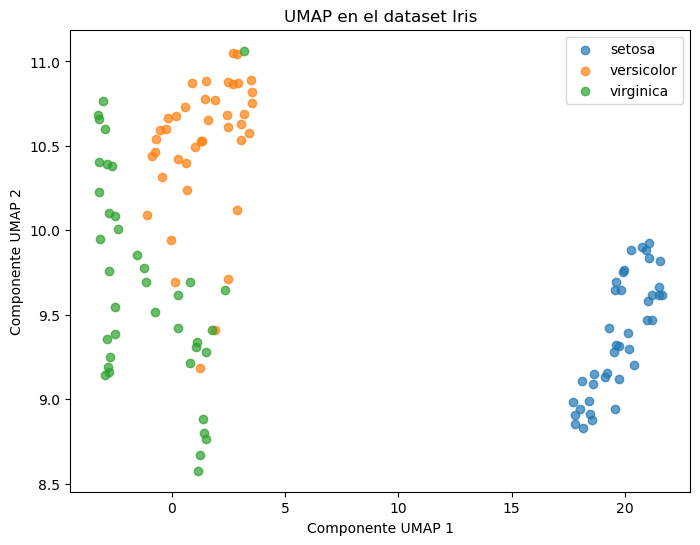

In [107]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_umap[y_train == i, 0], X_umap[y_train == i, 1], label=target_name, alpha=0.7)
plt.xlabel("Componente UMAP 1")
plt.ylabel("Componente UMAP 2")
plt.legend()
plt.title("UMAP en el dataset Iris")
plt.show()


#### Silhouette Score:
- Cercano a 1: Las clases están bien separadas.
- Cerca de 0: Hay solapamiento entre clases.
- Negativo: Los puntos están mal asignados a grupos.

In [108]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_umap, y_train)
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.50


In [109]:
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['target'] = y_train
df_umap

,UMAP1,UMAP2,target
0,19.571482,8.942396,0
1,17.724596,8.981395,0
2,-0.507952,10.592387,1
3,20.201881,9.293895,0
4,21.214327,9.466182,0
...,...,...,...
115,0.889092,10.869595,1
116,3.165619,11.063231,2
117,17.799789,8.905706,0
118,2.489191,10.612595,1
